<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/PySpark/pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 23.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=29a9a87b0a49e3b6d78c02d3076ab636a30b26baf20c46f7137d195232011202
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
import random
import pyspark

sc = pyspark.SparkContext()

def inside(p):
    x, y = random.random(), random.random()
    return x * x + y * y < 1

NUM_SAMPLES = 10 ** 7
count = sc.parallelize(range(NUM_SAMPLES)).filter(inside).count()
approx_pi = (4.0 * count / NUM_SAMPLES)
print(f"Pi is roughly {approx_pi}")

Pi is roughly 3.1429216


In [ ]:
import pandas as pd
from random import randint
from pyspark.sql import Row, SparkSession

from datetime import date, datetime
from faker import Faker

fake = Faker()
spark_session = SparkSession.builder.getOrCreate()

users_df = spark_session.createDataFrame([
    Row(
        first_name = fake.first_name(),
        last_name = fake.last_name(),
        date_of_birth = fake.date_of_birth(),
        address = fake.address(),
        salary = randint(2000, 15000),
        age = randint(25, 60),
        city = fake.city()
    )
    for _ in range(100)
])


In [ ]:
users_df.show()

+----------+---------+-------------+--------------------+------+---+-----------------+
|first_name|last_name|date_of_birth|             address|salary|age|             city|
+----------+---------+-------------+--------------------+------+---+-----------------+
|   Jeffrey|   Hansen|   2021-01-17|PSC 1490, Box 538...| 11924| 38|South Tamaramouth|
|      Lisa|   Archer|   1918-10-16|68533 Martha Trac...|  2096| 55|West Samanthaland|
|     Jacob|    Young|   1940-04-07|08120 Scott Motor...|  8920| 41|         Mayhaven|
|   Christy| Williams|   1993-03-27|545 Elizabeth Dri...|  4107| 29| East Jessicatown|
|   Bradley|    Smith|   2007-06-08|3938 Smith Ranch ...| 14922| 51| East Jeffreyview|
|    Thomas|  Herrera|   1927-02-25|0371 William Moto...|  5927| 48|  East Robertfort|
|     Tyler|    Burke|   1988-01-31|53570 Kaufman Sta...|  9501| 44| Lake Joshuaville|
|      Jade|    Duran|   2020-09-30|33295 Weiss Branc...|  4764| 34|      Lake Hailey|
|     Sarah|    Yates|   1951-10-24|444 Rya

In [ ]:
# user_df[['first_name', 'last_name']].show()
# user_df.select(['first_name', 'last_name']).show()
users_df.select(['*']).filter('age >= 40').show()

+----------+---------+-------------+--------------------+------+---+-----------------+
|first_name|last_name|date_of_birth|             address|salary|age|             city|
+----------+---------+-------------+--------------------+------+---+-----------------+
|      Lisa|   Archer|   1918-10-16|68533 Martha Trac...|  2096| 55|West Samanthaland|
|     Jacob|    Young|   1940-04-07|08120 Scott Motor...|  8920| 41|         Mayhaven|
|   Bradley|    Smith|   2007-06-08|3938 Smith Ranch ...| 14922| 51| East Jeffreyview|
|    Thomas|  Herrera|   1927-02-25|0371 William Moto...|  5927| 48|  East Robertfort|
|     Tyler|    Burke|   1988-01-31|53570 Kaufman Sta...|  9501| 44| Lake Joshuaville|
|     Sarah|    Yates|   1951-10-24|444 Ryan Crest\nP...|  3845| 54|        Jesseview|
|  Kimberly|   Harvey|   1985-05-31|7416 Gomez Strave...|  5309| 57|     Emilychester|
|     Tyler|    Adams|   2018-09-03|603 Sara Pass Apt...| 10554| 45|         Susanton|
|    Robert|    Welch|   1987-09-03|60832 B

In [ ]:
users_df.corr('salary', 'age')

-0.0468698722837763

In [ ]:
user_df.describe().show()

+-------+----------+---------+--------------------+------------------+------------------+---------------+
|summary|first_name|last_name|             address|            salary|               age|           city|
+-------+----------+---------+--------------------+------------------+------------------+---------------+
|  count|       100|      100|                 100|               100|               100|            100|
|   mean|      null|     null|                null|           8585.33|              44.9|           null|
| stddev|      null|     null|                null|3909.4131571674975|11.123276168794547|           null|
|    min|    Alexis| Anderson|024 Murphy Creek\...|              2034|                25|     Andreastad|
|    max|   William|   Zamora|Unit 1881 Box 565...|             14876|                60|Whitakerborough|
+-------+----------+---------+--------------------+------------------+------------------+---------------+



In [ ]:
from pyspark.sql.functions import mean, stddev, round as _round

users_df.select(
    mean("age").alias("average age"),
    _round(stddev("age"), 2).alias("age stddev")
).show()

+-----------+----------+
|average age|age stddev|
+-----------+----------+
|      43.72|     10.89|
+-----------+----------+



In [ ]:
users_df.groupBy("city").avg("age").show()

+-----------------+--------+
|             city|avg(age)|
+-----------------+--------+
|       Howellstad|    45.0|
|  South Sarahbury|    37.0|
|      Samuelville|    29.0|
|      Gregoryside|    48.0|
|        Jesseview|    54.0|
|    Morganborough|    59.0|
|       Lake Duane|    48.0|
|New Daniellemouth|    28.0|
|       Wayneville|    57.0|
|     New Franklin|    26.0|
|     Gregoryville|    58.0|
|         Susanton|    45.0|
|  West Rachelberg|    58.0|
|South Tamaramouth|    38.0|
|     Port Leonard|    33.0|
|         New Eric|    35.0|
|    Catherineside|    48.0|
|West Samanthaland|    55.0|
|     South Nicole|    43.0|
|       Millerstad|    40.0|
+-----------------+--------+
only showing top 20 rows



In [ ]:
users_df.groupBy("city").avg("salary").show()

+-----------------+-----------+
|             city|avg(salary)|
+-----------------+-----------+
|       Howellstad|     6835.0|
|  South Sarahbury|     8097.0|
|      Samuelville|    11702.0|
|      Gregoryside|    11116.0|
|        Jesseview|     3845.0|
|    Morganborough|     3727.0|
|       Lake Duane|    10003.0|
|New Daniellemouth|    14828.0|
|       Wayneville|    10292.0|
|     New Franklin|     3501.0|
|     Gregoryville|    10905.0|
|         Susanton|    10554.0|
|  West Rachelberg|     7089.0|
|South Tamaramouth|    11924.0|
|     Port Leonard|     3813.0|
|         New Eric|    10440.0|
|    Catherineside|    14295.0|
|West Samanthaland|     2096.0|
|     South Nicole|     8731.0|
|       Millerstad|     7412.0|
+-----------------+-----------+
only showing top 20 rows



In [ ]:
users_df.agg({"age": "avg"}).show()

+--------+
|avg(age)|
+--------+
|   43.72|
+--------+



In [ ]:
users_df.groupBy("city").count().show()

+-----------------+-----+
|             city|count|
+-----------------+-----+
|       Howellstad|    1|
|  South Sarahbury|    1|
|      Samuelville|    1|
|      Gregoryside|    1|
|        Jesseview|    1|
|    Morganborough|    1|
|       Lake Duane|    1|
|New Daniellemouth|    1|
|       Wayneville|    1|
|     New Franklin|    1|
|     Gregoryville|    1|
|         Susanton|    1|
|  West Rachelberg|    1|
|South Tamaramouth|    1|
|     Port Leonard|    1|
|         New Eric|    1|
|    Catherineside|    1|
|West Samanthaland|    1|
|     South Nicole|    1|
|       Millerstad|    1|
+-----------------+-----+
only showing top 20 rows



In [ ]:
len({row.city for row in users_df[['city']].collect()})

97

In [ ]:
users_df.groupBy('city').count().filter('count > 1').show()

+------------+-----+
|        city|count|
+------------+-----+
|East Michael|    3|
|Heathershire|    2|
+------------+-----+



In [ ]:
users_df.groupBy('city').count().filter('count > 1 and count=0').collect()

[]

In [ ]:
users_df.agg({'age':'avg', 'salary':'avg'}).show()

+-----------+--------+
|avg(salary)|avg(age)|
+-----------+--------+
|    8426.94|   43.72|
+-----------+--------+



In [ ]:
res = users_df.groupBy('city')
type(res)

pyspark.sql.group.GroupedData

In [ ]:
res.agg({'age':'min'}).show()

+-----------------+--------+
|             city|min(age)|
+-----------------+--------+
|       Howellstad|      45|
|  South Sarahbury|      37|
|      Samuelville|      29|
|      Gregoryside|      48|
|        Jesseview|      54|
|    Morganborough|      59|
|       Lake Duane|      48|
|New Daniellemouth|      28|
|       Wayneville|      57|
|     New Franklin|      26|
|     Gregoryville|      58|
|         Susanton|      45|
|  West Rachelberg|      58|
|South Tamaramouth|      38|
|     Port Leonard|      33|
|         New Eric|      35|
|    Catherineside|      48|
|West Samanthaland|      55|
|     South Nicole|      43|
|       Millerstad|      40|
+-----------------+--------+
only showing top 20 rows



In [ ]:
users_df.show()

+----------+---------+-------------+--------------------+------+---+-----------------+
|first_name|last_name|date_of_birth|             address|salary|age|             city|
+----------+---------+-------------+--------------------+------+---+-----------------+
|   Jeffrey|   Hansen|   2021-01-17|PSC 1490, Box 538...| 11924| 38|South Tamaramouth|
|      Lisa|   Archer|   1918-10-16|68533 Martha Trac...|  2096| 55|West Samanthaland|
|     Jacob|    Young|   1940-04-07|08120 Scott Motor...|  8920| 41|         Mayhaven|
|   Christy| Williams|   1993-03-27|545 Elizabeth Dri...|  4107| 29| East Jessicatown|
|   Bradley|    Smith|   2007-06-08|3938 Smith Ranch ...| 14922| 51| East Jeffreyview|
|    Thomas|  Herrera|   1927-02-25|0371 William Moto...|  5927| 48|  East Robertfort|
|     Tyler|    Burke|   1988-01-31|53570 Kaufman Sta...|  9501| 44| Lake Joshuaville|
|      Jade|    Duran|   2020-09-30|33295 Weiss Branc...|  4764| 34|      Lake Hailey|
|     Sarah|    Yates|   1951-10-24|444 Rya

In [ ]:
from pyspark.sql.functions import udf

@udf('float')
def amount_net(amount_gross: float) -> float:
    return amount_gross * 0.81

In [ ]:
users_df.select(
    '*',
    users_df.salary.alias('SALARY GROSS'),
    amount_net(users_df.salary).alias('SALARY NET')
).filter('age >= 30').orderBy('age', ascending=False).show()

+----------+---------+-------------+--------------------+------+---+--------------------+------------+----------+
|first_name|last_name|date_of_birth|             address|salary|age|                city|SALARY GROSS|SALARY NET|
+----------+---------+-------------+--------------------+------+---+--------------------+------------+----------+
|   Michael|  Johnson|   1947-10-14|798 Roach Port Ap...|  5727| 60|        Johnsonville|        5727|   4638.87|
|   Melissa| Matthews|   2000-03-10|972 Kimberly Curv...| 11496| 60|   Lake Annettemouth|       11496|   9311.76|
|     Bryan|  Jackson|   1988-11-04|2005 Sanchez Rout...| 10207| 60|    Port Luisborough|       10207|   8267.67|
|     Maria|    Kelly|   1927-11-24|46501 Kenneth Str...|  3727| 59|       Morganborough|        3727|   3018.87|
|  Michelle|  Sanders|   1995-01-30|07802 Murphy Plac...|  9004| 59|Lake Christophers...|        9004|   7293.24|
|     Karen|  Rollins|   2022-08-25|PSC 7990, Box 692...|  7618| 59|       North William

In [ ]:
# sql view
users_df.createOrReplaceTempView("Users")

In [ ]:
spark_session.sql(
    """
      Select 
        city as `City`, avg(age) as `Average age` 
        From Users 
        Group By city
        Order by `Average age` desc
        Limit 3
    """).show()

+-----------------+-----------+
|             City|Average age|
+-----------------+-----------+
|     Johnsonville|       60.0|
| Port Luisborough|       60.0|
|Lake Annettemouth|       60.0|
+-----------------+-----------+



In [ ]:
result = spark_session.sql(
    """
      Select 
        city as `City`, avg(age) as `Average age` 
        From Users 
        Group By city
        Order by `Average age` desc
        Limit 3
    """)


In [ ]:
result.collect()

[Row(City='Johnsonville', Average age=60.0),
 Row(City='Port Luisborough', Average age=60.0),
 Row(City='Lake Annettemouth', Average age=60.0)]

In [ ]:
avg_ages_by_city = spark_session.sql(
    """
      Select 
        city as `City`, avg(age) as `Average age` 
        From Users 
        Group By city
        Order by `Average age`
        Limit 30
    """)

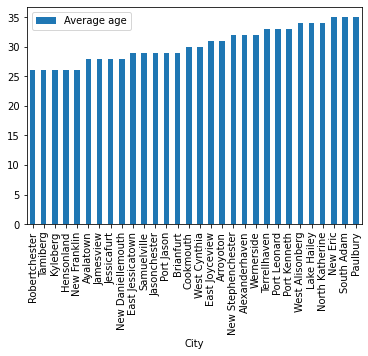

In [ ]:
avg_ages_by_city.toPandas().plot(x='City', y='Average age', kind='bar');

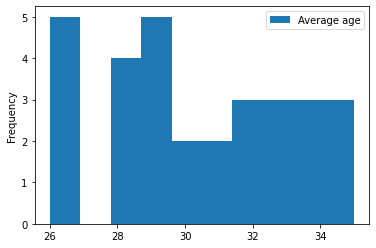

In [ ]:
avg_ages_by_city[['Average age']].toPandas().plot(kind='hist');

In [ ]:
users_by_city = spark_session.sql("Select first_name, last_name, city From Users")
salaries_by_city = spark_session.sql("Select salary, city From Users")

users_by_city.createOrReplaceTempView("UsersByCity")
salaries_by_city.createOrReplaceTempView("SalariesByCity")

In [ ]:
spark_session.sql(
    """
      Select
      u.first_name,
      u.last_name,
      u.city,
      s.salary
      From UsersByCity u 
      Inner Join SalariesByCity s 
      On u.city = s.city
    """).show()

+----------+----------+-----------------+------+
|first_name| last_name|             city|salary|
+----------+----------+-----------------+------+
|   Cynthia|     Mckee|       Howellstad|  6835|
|   Matthew|    Powell|  South Sarahbury|  8097|
|     Bobby|    Graham|      Samuelville| 11702|
|       Amy|   Johnson|      Gregoryside| 11116|
|     Sarah|     Yates|        Jesseview|  3845|
|     Maria|     Kelly|    Morganborough|  3727|
|     Tracy|       Liu|       Lake Duane| 10003|
| Katherine|   Huffman|New Daniellemouth| 14828|
|   Heather|     Munoz|       Wayneville| 10292|
|     Wendy|   Johnson|     New Franklin|  3501|
|   Michael|    Arnold|     Gregoryville| 10905|
|     Tyler|     Adams|         Susanton| 10554|
| Elizabeth|     Foley|  West Rachelberg|  7089|
|   Jeffrey|    Hansen|South Tamaramouth| 11924|
|    Sandra|   Morales|     Port Leonard|  3813|
|     Tracy|    Nelson|         New Eric| 10440|
|     Brent|Strickland|    Catherineside| 14295|
|      Lisa|    Arch

In [ ]:
result = spark_session.sql(
    """
      Select
      u.first_name,
      u.last_name,
      u.city,
      s.salary
      From UsersByCity u 
      Inner Join SalariesByCity s 
      On u.city = s.city
    """)

In [ ]:
result.show()

+----------+----------+-----------------+------+
|first_name| last_name|             city|salary|
+----------+----------+-----------------+------+
|   Cynthia|     Mckee|       Howellstad|  6835|
|   Matthew|    Powell|  South Sarahbury|  8097|
|     Bobby|    Graham|      Samuelville| 11702|
|       Amy|   Johnson|      Gregoryside| 11116|
|     Sarah|     Yates|        Jesseview|  3845|
|     Maria|     Kelly|    Morganborough|  3727|
|     Tracy|       Liu|       Lake Duane| 10003|
| Katherine|   Huffman|New Daniellemouth| 14828|
|   Heather|     Munoz|       Wayneville| 10292|
|     Wendy|   Johnson|     New Franklin|  3501|
|   Michael|    Arnold|     Gregoryville| 10905|
|     Tyler|     Adams|         Susanton| 10554|
| Elizabeth|     Foley|  West Rachelberg|  7089|
|   Jeffrey|    Hansen|South Tamaramouth| 11924|
|    Sandra|   Morales|     Port Leonard|  3813|
|     Tracy|    Nelson|         New Eric| 10440|
|     Brent|Strickland|    Catherineside| 14295|
|      Lisa|    Arch

In [ ]:
result.toPandas().to_csv('result.csv')

In [ ]:
result.rdd.saveAsTextFile('result_rdd.txt')

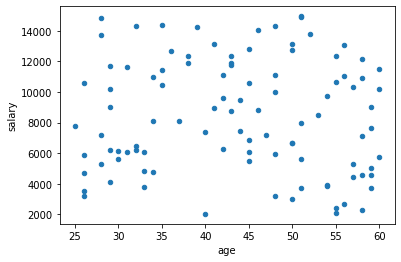

In [ ]:
users_df.select(['age', 'salary']).toPandas().plot(x='age', y='salary', kind='scatter');